# Dados vetoriais: velocidade de um fundeio

In [1]:
import pandas as pd


url = "https://raw.githubusercontent.com/ocefpaf/SciPyLA_2016_tutorial/master/data/15t30717.3f1"

cols = ['j', 'u', 'v', 'temp', 'sal', 'year', 'month', 'day', 'hour', 'minute']

df = pd.read_csv(
    url,
    delimiter=r"\s+",
    names=cols,
)


df.head()

,j,u,v,temp,sal,year,month,day,hour,minute
0,564.1250,11.7,-1.3,28.3,29.2,1993,7,18,3,0
1,564.1667,12.3,-4.5,28.1,29.4,1993,7,18,4,0
2,564.2083,9.6,-5.3,27.6,31.0,1993,7,18,5,0
3,564.2500,7.6,-2.3,27.2,32.4,1993,7,18,6,0
4,564.2917,10.6,-2.0,27.2,32.5,1993,7,18,7,0


In [2]:
df.index = pd.to_datetime(
    df[["year", "month", "day", "hour", "minute"]]
)

df.head()

,j,u,v,temp,sal,year,month,day,hour,minute
1993-07-18 03:00:00,564.1250,11.7,-1.3,28.3,29.2,1993,7,18,3,0
1993-07-18 04:00:00,564.1667,12.3,-4.5,28.1,29.4,1993,7,18,4,0
1993-07-18 05:00:00,564.2083,9.6,-5.3,27.6,31.0,1993,7,18,5,0
1993-07-18 06:00:00,564.2500,7.6,-2.3,27.2,32.4,1993,7,18,6,0
1993-07-18 07:00:00,564.2917,10.6,-2.0,27.2,32.5,1993,7,18,7,0


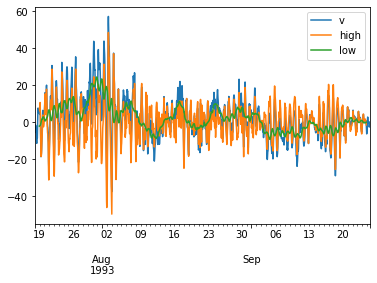

In [3]:
df['low'] = df['v'].rolling(window=40, center=True).mean()

df['high'] = df['v'] - df['low']
df[['v', 'high', 'low']].plot();

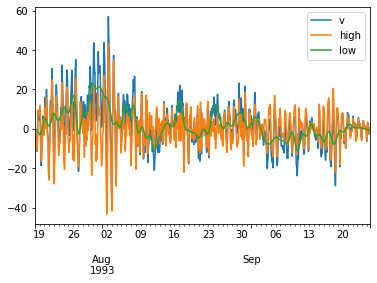

In [4]:
import numpy as np
from oceans.filters import lanc

freq = 1./40  # Hours
window_size = 96+1+96
pad = np.zeros(window_size) * np.NaN

wt = lanc(window_size, freq)
res = np.convolve(wt, df['v'], mode='same')

df['low'] = res
df['high'] = df['v'] - df['low']

df[['v', 'high', 'low']].plot();

In [5]:
import utide
from matplotlib.dates import date2num


time = date2num(df.index.to_pydatetime())

coef = utide.solve(
    time,
    df['u'].values,
    df['v'].values,
    lat=32,
    trend=True,
    conf_int="linear",
)

solve: matrix prep ... solution ... diagnostics ... done.


In [6]:
tide = utide.reconstruct(time, coef)

prep/calcs ... done.


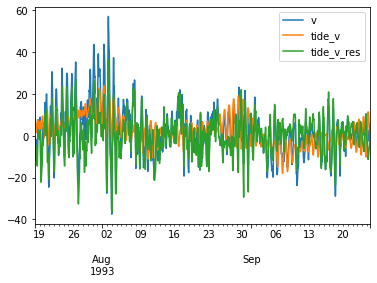

In [7]:
df["tide_v"] = tide["v"]
df["tide_v_res"] = df["v"]-tide["v"]


df[["v", "tide_v", "tide_v_res"]].plot();

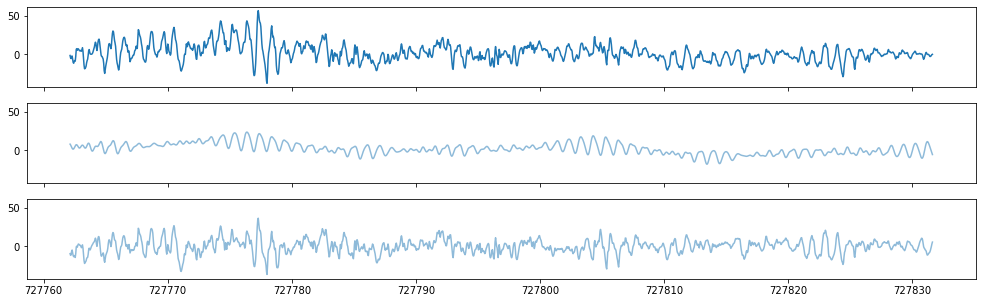

In [8]:
import matplotlib.pyplot as plt


fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(17, 5))

ax0.plot(time, df["v"], label=u"Observations")
ax1.plot(time, tide["v"], alpha=0.5, label=u"Prediction")
ax2.plot(time, df["v"]-tide["v"], alpha=0.5, label=u"Residue");